In [14]:
# set up jupyter-notebook
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Gaussian Distribution

$$ \begin{aligned} L(\mu) &=\prod_{i=1}^{n} \frac{1}{\sqrt{2 \pi \sigma^{2}}} \exp -\frac{\left(x_{i}-\mu\right)^{2}}{2 \sigma^{2}} \\ \Rightarrow \ell(\mu) &=\sum_{i=1}^{n}\left[\log \left(\frac{1}{\sqrt{2 \pi \sigma^{2}}}\right)-\frac{\left(x_{i}-\mu\right)^{2}}{2 \sigma^{2}}\right] \\ \Rightarrow \frac{d}{d \mu} \ell(\mu) &=\sum_{i=1}^{n} \frac{x_{i}-\mu}{\sigma^{2}} \end{aligned} $$

Gaussian Mixture Models

Assume we observe X1,…,Xn and that each Xi is sampled from one of K mixture components. Associated with each random variable Xi is a label Zi∈{1,…,K} which indicates which component Xi came from. In our height example, Zi would be either 1 or 2 depending on whether Xi was a male or female height. Often times we don’t observe Zi (e.g. we might just obtain a list of heights with no gender information), so the Zi’s are sometimes called latent variables.

From the law of total probability, we know that the marginal probability of Xi is:

$$
P\left(X_{i}=x\right)=\sum_{k=1}^{K} P\left(X_{i}=x | Z_{i}=k\right) \underbrace{P\left(Z_{i}=k\right)}_{\pi k}=\sum_{k=1}^{K} P\left(X_{i}=x | Z_{i}=k\right) \pi_{k}
$$

Here, the $$
\pi_{k}
$$ are called mixture proportions or mixture weights and they represent the probability that Xi belongs to the k-th mixture component. The mixture proportions are nonnegative and they sum to one, $$
\sum_{k=1}^{K} \pi_{k}=1
$$. We call $$
P\left(X_{i} | Z_{i}=k\right)
$$) the mixture component, and it represents the distribution of Xi assuming it came from component k. The mixture components in our examples above were normal distributions.
<hr>
If we observe independent samples X1,…,Xn from this mixture, with mixture proportion vector π=(π1,π2,…,πK), then the likelihood function is:


$$ L(\pi)=\prod_{i=1}^{n} P\left(X_{i} | \pi\right)=\prod_{i=1}^{n} \sum_{k=1}^{K} P\left(X_{i} | Z_{i}=k\right) \pi_{k} $$
<hr>

first, we need to generate GMM models. 
Just recall the function of Gaussian Mixture Models is:

\begin{equation}
\large
p(\mathbf x | \mathbf\mu, \mathbf\Sigma) = \frac 1 {({2\pi})^{n/2}|\Sigma|^{1/2}}\exp\left(-\frac 1 2 (\mathbf x -\mathbf\mu)^T\mathbf\Sigma^{-1}(\mathbf x -\mathbf\mu)\right)
\end{equation}

Covariance Matrics: $$ \Sigma $$

Calculation for Covariance Matrics:

$$
\mathbf{X}=\left(X_{1}, X_{2}, \ldots, X_{n}\right)^{\mathrm{T}}
$$


$$
\mathrm{K}_{\mathrm{XX}}=\left[\begin{array}{cccc}{\mathrm{E}\left[\left(X_{1}-\mathrm{E}\left[X_{1}\right]\right)\left(X_{1}-\mathrm{E}\left[X_{1}\right]\right)\right]} & {\mathrm{E}\left[\left(X_{1}-\mathrm{E}\left[X_{1}\right]\right)\left(X_{2}-\mathrm{E}\left[X_{2}\right]\right)\right]} & {\cdots} & {\mathrm{E}\left[\left(X_{1}-\mathrm{E}\left[X_{1}\right]\right)\left(X_{n}-\mathrm{E}\left[X_{n}\right]\right)\right]} \\ {\mathrm{E}\left[\left(X_{2}-\mathrm{E}\left[X_{2}\right]\right)\left(X_{1}-\mathrm{E}\left[X_{1}\right]\right)\right]} & {\mathrm{E}\left[\left(X_{2}-\mathrm{E}\left[X_{2}\right]\right)\left(X_{2}-\mathrm{E}\left[X_{2}\right]\right)\right]} & {\cdots} & {\mathrm{E}\left[\left(X_{2}-\mathrm{E}\left[X_{2}\right]\right)\left(X_{n}-\mathrm{E}\left[X_{n}\right]\right)\right]} \\ {\vdots} & {\vdots} & {\ddots} & {\vdots} \\ {\mathrm{E}\left[\left(X_{n}-\mathrm{E}\left[X_{n}\right]\right)\left(X_{1}-\mathrm{E}\left[X_{1}\right]\right)\right]} & {\mathrm{E}\left[\left(X_{n}-\mathrm{E}\left[X_{n}\right]\right)\left(X_{2}-\mathrm{E}\left[X_{2}\right]\right)\right]} & {\cdots} & {\mathrm{E}\left[\left(X_{n}-\mathrm{E}\left[X_{n}\right]\right)\left(X_{n}-\mathrm{E}\left[X_{n}\right]\right)\right]}\end{array}\right]
$$

MLE for Gaussian Mixture Models

$$
\begin{aligned} L(\mu) &=\prod_{i=1}^{n} \frac{1}{\sqrt{2 \pi \sigma^{2}}} \exp -\frac{\left(x_{i}-\mu\right)^{2}}{2 \sigma^{2}} \\ \Rightarrow \ell(\mu) &=\sum_{i=1}^{n}\left[\log \left(\frac{1}{\sqrt{2 \pi \sigma^{2}}}\right)-\frac{\left(x_{i}-\mu\right)^{2}}{2 \sigma^{2}}\right] \\ \Rightarrow \frac{d}{d \mu} \ell(\mu) &=\sum_{i=1}^{n} \frac{x_{i}-\mu}{\sigma^{2}} \end{aligned}
$$

<hr>

Now we attempt the same strategy for deriving the MLE of the Gaussian mixture model. Our unknown parameters are θ={μ1,…,μK,σ1,…,σK,π1,…,πK}, and so from the first section of this note, our likelihood is:


$$
\begin{array}{c}{L\left(\theta | X_{1}, \ldots, X_{n}\right)=\prod_{i=1}^{n} \sum_{k=1}^{K} \pi_{k} N\left(x_{i} ; \mu_{k}, \sigma_{k}^{2}\right)} \\ {\ell(\theta)=\sum_{i=1}^{n} \log \left(\sum_{k=1}^{K} \pi_{k} N\left(x_{i} ; \mu_{k}, \sigma_{k}^{2}\right)\right)}\end{array}
$$


$$
\sum_{i=1}^{n} \frac{1}{\sum_{k=1}^{K} \pi_{k} N\left(x_{i} ; \mu_{k}, \sigma_{k}\right)} \pi_{k} N\left(x_{i} ; \mu_{k}, \sigma_{k}\right) \frac{\left(x_{i}-\mu_{k}\right)}{\sigma_{k}^{2}}=0
$$

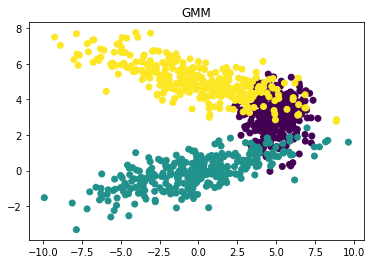

(900, 900)


In [21]:
# from sklearn import datasets
# iris = datasets.load_iris()
# X = iris.data
# print(X[:10])
# plt.scatter(X[:, 0], X[:, 1])
# plt.title('0 column and 1 colmun')
# plt.show()
# plt.scatter(X[:, 2], X[:, 3])
# plt.title('2 column and 3 colmun')
# plt.show()

import numpy as np
import matplotlib.pyplot as plt
n_samples = 300

# generate random sample, two cluster
np.random.seed(0)
# generate spherical data 
shifted_gaussian = np.random.randn(n_samples, 2) + np.array([5, 3])
# generate zero centered stretched Gaussian data
C = np.array([[0., -0.7], [3.5, .7]])
stretched_gaussian = np.dot(np.random.randn(n_samples, 2), C)
# the other one
stretched_shifted_gaussian = np.dot(np.random.randn(n_samples, 2), np.array([[0., -0.7], [-3.5, .7]])) + np.array([0, 5])

# concatenate the two datasets into the final training set
X = np.vstack([shifted_gaussian, stretched_gaussian, stretched_shifted_gaussian])

cluster = [0 for n in range(n_samples)] + [1 for n in range(n_samples)] + [2 for n in range(n_samples)]

plt.scatter(X[:, 0], X[:, 1], c=cluster)
plt.title('GMM')
plt.show()

# calculating Cov
cov_X = np.cov(X)
print(cov_X.shape)

<hr>
z is a latent variable correspinding to the probability of x(i) is from K-cluster.  

Defining the marginal distribution over z is specified in terms of the mixing coefficients $$
\pi_{k}
$$

So:
$$
p\left(z_{k}=1\right)=\pi_{k}
$$

$$
p(\mathbf{z})=\prod_{k=1}^{K} \pi_{k}^{z_{k}}
$$

<hr>
Similar:

$$
p\left(\mathbf{x} | z_{k}=1\right)=\mathcal{N}\left(\mathbf{x} | \boldsymbol{\mu}_{k}, \mathbf{\Sigma}_{k}\right)
$$

$$
p(\mathbf{x} | \mathbf{z})=\prod_{k=1}^{K} \mathcal{N}\left(\mathbf{x} | \boldsymbol{\mu}_{k}, \mathbf{\Sigma}_{k}\right)^{z_{k}}
$$
<hr>
So as for P(x) is to sum up all the joint distribution p(z)p(x|z)
$$
p(\mathbf{x})=\sum_{\mathbf{z}} p(\mathbf{z}) p(\mathbf{x} | \mathbf{z})=\sum_{k=1}^{K} \pi_{k} \mathcal{N}\left(\mathbf{x} | \boldsymbol{\mu}_{k}, \mathbf{\Sigma}_{k}\right)
$$

in this case, we need to work with the latent variable z(n) which is corresponding with x(n)

So we can work with join distribution p(x|z) instead of the marginal distribution p()

According to Bayes's theorem:

$$
P(A | B)=\frac{P(B | A) P(A)}{P(B)}
$$
<hr>

$$
p(\mathbf{x})=\sum_{\mathbf{z}} p(\mathbf{z}) p(\mathbf{x} | \mathbf{z})=\sum_{k=1}^{K} \pi_{k} \mathcal{N}\left(\mathbf{x} | \boldsymbol{\mu}_{k}, \mathbf{\Sigma}_{k}\right)
$$
<hr>

$$
\begin{aligned} \gamma\left(z_{k}\right) \equiv p\left(z_{k}=1 | \mathbf{x}\right) &=\frac{p\left(z_{k}=1\right) p\left(\mathbf{x} | z_{k}=1\right)}{\sum_{j=1}^{K} p\left(z_{j}=1\right) p\left(\mathbf{x} | z_{j}=1\right)} \\ &=\frac{\pi_{k} \mathcal{N}\left(\mathbf{x} | \boldsymbol{\mu}_{k}, \mathbf{\Sigma}_{k}\right)}{\sum_{j=1}^{K} \pi_{j} \mathcal{N}\left(\mathbf{x} | \boldsymbol{\mu}_{j}, \mathbf{\Sigma}_{j}\right)} \end{aligned}
$$

So the log of the likelihood function is:

$$
\ln p(\mathbf{X} | \boldsymbol{\pi}, \boldsymbol{\mu}, \mathbf{\Sigma})=\sum_{n=1}^{N} \ln \left\{\sum_{k=1}^{K} \pi_{k} \mathcal{N}\left(\mathbf{x}_{n} | \boldsymbol{\mu}_{k}, \boldsymbol{\Sigma}_{k}\right)\right\}
$$

derivatives of this log likelihood function:

$$
0=-\sum_{n=1}^{N} \underbrace{\frac{\pi_{k} \mathcal{N}\left(\mathbf{x}_{n} | \boldsymbol{\mu}_{k}, \mathbf{\Sigma}_{k}\right)}{\sum_{j} \pi_{j} \mathcal{N}\left(\mathbf{x}_{n} | \boldsymbol{\mu}_{j}, \mathbf{\Sigma}_{j}\right)}}_{\gamma\left(z_{n k}\right)} \boldsymbol{\Sigma}_{k}\left(\mathbf{x}_{n}-\boldsymbol{\mu}_{k}\right)
$$

<hr>

Be careful, maybe there is a singularity problem. Check this link:
https://stats.stackexchange.com/questions/219302/singularity-issues-in-gaussian-mixture-model
<hr>
identifiability issue

DEBUG:TestKmeanPP:[[-0.08585881  4.96844362]
 [ 4.8614651  -4.93457361]
 [-4.93623156 -5.13052037]]
DEBUG:TestKmeanPP:->begin to draw gaussian models


(300,) (300, 2) (300,)
(300,) (300, 2) (300,)


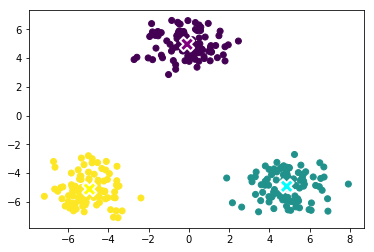

.
----------------------------------------------------------------------
Ran 1 test in 0.344s

OK


In [16]:
#import k-means
%run ../test_algorithms/test_kmean.py

(900,) (900, 2) (900,)
(900,) (900, 2) (900,)
[[ 4.50160762  2.95849499]
 [-2.17251949  5.46165051]
 [-1.57772908 -0.38899908]]


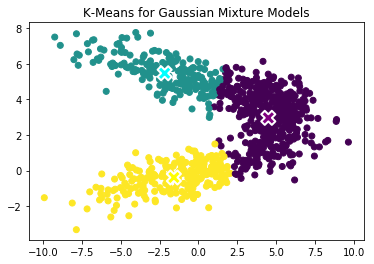

In [22]:
kpp = KMeansPP(3)
kpp.fit(X)
cluster = kpp.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=cluster)
plt.scatter(kpp.centers[:, 0], kpp.centers[:, 1], s=200, marker='X', lw=2, c=['purple', 'cyan', 'yellow'],
            edgecolor="white")
plt.title('K-Means for Gaussian Mixture Models')
plt.show()

<hr>
as you can see, K-Means can't solve this GMM problem.
Now We try EM Algorithm(Expectation Maximum)
<hr>
from:

$$
0=-\sum_{n=1}^{N} \underbrace{\frac{\pi_{k} \mathcal{N}\left(\mathbf{x}_{n} | \boldsymbol{\mu}_{k}, \mathbf{\Sigma}_{k}\right)}{\sum_{j} \pi_{j} \mathcal{N}\left(\mathbf{x}_{n} | \boldsymbol{\mu}_{j}, \mathbf{\Sigma}_{j}\right)}}_{\gamma\left(z_{n k}\right)} \boldsymbol{\Sigma}_{k}\left(\mathbf{x}_{n}-\boldsymbol{\mu}_{k}\right)
$$
<hr>


$$
\boldsymbol{\mu}_{k}=\frac{1}{N_{k}} \sum_{n=1}^{N} \gamma\left(z_{n k}\right) \mathbf{x}_{n}
$$

$$
\boldsymbol{\Sigma}_{k}=\frac{1}{N_{k}} \sum_{n=1}^{N} \gamma\left(z_{n k}\right)\left(\mathbf{x}_{n}-\boldsymbol{\mu}_{k}\right)\left(\mathbf{x}_{n}-\boldsymbol{\mu}_{k}\right)^{\mathrm{T}}
$$

Finally, we maximize ln p(X|π, μ, Σ) with respect to the mixing coefficients πk. Here, we must take account of the constraint:

$$
\sum_{k=1}^{K} \pi_{k}=1
$$
So:
$$
\begin{array}{c}{\ln p(\mathbf{X} | \boldsymbol{\pi}, \boldsymbol{\mu}, \mathbf{\Sigma})+\lambda\left(\sum_{k=1}^{K} \pi_{k}-1\right)} \\ {0=\sum_{n=1}^{N} \frac{\mathcal{N}\left(\mathbf{x}_{n} | \boldsymbol{\mu}_{k}, \boldsymbol{\Sigma}_{k}\right)}{\sum_{j} \pi_{j} \mathcal{N}\left(\mathbf{x}_{n} | \boldsymbol{\mu}_{j}, \boldsymbol{\Sigma}_{j}\right)}+\lambda}\end{array}
$$

In [23]:
mu = kpp.centers
cluster_num, dim = mu.shape

"""
np.cov bias argument
Default normalization (False) is by (N - 1), where N is the number of observations given (unbiased estimate). 
If bias is True, then normalization is by N. 
These values can be overridden by using the keyword ddof in numpy versions >= 1.5.
"""
cov = (np.cov(X.T, bias=True))
# 3 * 2 * 2 
cov_matrics = np.array([cov for _ in range(cluster_num)])
coef = np.ones(cluster_num) / 3
# responsibility for E-Step 
resp = np.zeros((len(X), cluster_num))
params = np.hstack(
    (mu.ravel(),
    cov_matrics.ravel(),
    coef.ravel())
)
print('--', mu.ravel(),
    cov_matrics.ravel(),
    coef.ravel(), '--', params, '--')
print(cov_matrics, cluster_num, dim, resp.shape)


-- [ 4.50160762  2.95849499 -2.17251949  5.46165051 -1.57772908 -0.38899908] [13.88626651  0.34930183  0.34930183  5.4585099  13.88626651  0.34930183
  0.34930183  5.4585099  13.88626651  0.34930183  0.34930183  5.4585099 ] [0.33333333 0.33333333 0.33333333] -- [ 4.50160762  2.95849499 -2.17251949  5.46165051 -1.57772908 -0.38899908
 13.88626651  0.34930183  0.34930183  5.4585099  13.88626651  0.34930183
  0.34930183  5.4585099  13.88626651  0.34930183  0.34930183  5.4585099
  0.33333333  0.33333333  0.33333333] --
[[[13.88626651  0.34930183]
  [ 0.34930183  5.4585099 ]]

 [[13.88626651  0.34930183]
  [ 0.34930183  5.4585099 ]]

 [[13.88626651  0.34930183]
  [ 0.34930183  5.4585099 ]]] 3 2 (900, 3)


Now implement Gaussian Fuction:
\begin{equation}
\large
p(\mathbf x | \mathbf\mu, \mathbf\Sigma) = \frac 1 {({2\pi})^{D/2}|\Sigma|^{1/2}}\exp\left(-\frac 1 2 (\mathbf x -\mathbf\mu)^T\mathbf\Sigma^{-1}(\mathbf x -\mathbf\mu)\right)
\end{equation}

E-Step:(allocating the probability of that data point belonging to each one of the clusters)
According to Bayes's theorem:

$$
P(A | B)=\frac{P(B | A) P(A)}{P(B)}
$$
<hr>

$$
p(\mathbf{x})=\sum_{\mathbf{z}} p(\mathbf{z}) p(\mathbf{x} | \mathbf{z})=\sum_{k=1}^{K} \pi_{k} \mathcal{N}\left(\mathbf{x} | \boldsymbol{\mu}_{k}, \mathbf{\Sigma}_{k}\right)
$$
<hr>

$$
\begin{aligned} \gamma\left(z_{k}\right) \equiv p\left(z_{k}=1 | \mathbf{x}\right) &=\frac{p\left(z_{k}=1\right) p\left(\mathbf{x} | z_{k}=1\right)}{\sum_{j=1}^{K} p\left(z_{j}=1\right) p\left(\mathbf{x} | z_{j}=1\right)} \\ &=\frac{\pi_{k} \mathcal{N}\left(\mathbf{x} | \boldsymbol{\mu}_{k}, \mathbf{\Sigma}_{k}\right)}{\sum_{j=1}^{K} \pi_{j} \mathcal{N}\left(\mathbf{x} | \boldsymbol{\mu}_{j}, \mathbf{\Sigma}_{j}\right)} \end{aligned}
$$

In [19]:
from scipy.stats import multivariate_normal
# The following code is defined in book.
# def _gauss(X, cov, mu, dim):
#     d = X[:, None, :] - mu
#     D_sq = np.sum(np.einsum('nki,kij->nkj', d, cov) * d, -1)

#     return (
#         np.exp(-0.5 * D_sq)
#         / np.sqrt(
#             np.linalg.det(cov) * (2 * np.pi) ** dim
#         )
#     )

# print(_gauss(X, cov_matrics, mu, dim))
print(resp.shape)
def _e_step():
    global resp
    for i in range(cluster_num):
        likelihood = multivariate_normal.pdf(X, mean=mu[i], cov=cov_matrics[i])
        resp[:, i] = coef[i] * likelihood
    # normalization for over all possible cluster assignments
    # resp = resp / resp.sum(axis = 1)[:,np.newaxis]
    resp = resp / resp.sum(axis = 1, keepdims=True)


_e_step()



(900, 3)


$$
N_{k}=\sum_{n=1}^{N} \gamma\left(z_{n k}\right)
$$


$$
\begin{aligned} \boldsymbol{\mu}_{k}^{\mathrm{new}} &=\frac{1}{N_{k}} \sum_{n=1}^{N} \gamma\left(z_{n k}\right) \mathbf{x}_{n} \\ \boldsymbol{\Sigma}_{k}^{\mathrm{new}} &=\frac{1}{N_{k}} \sum_{n=1}^{N} \gamma\left(z_{n k}\right)\left(\mathbf{x}_{n}-\boldsymbol{\mu}_{k}^{\mathrm{new}}\right)\left(\mathbf{x}_{n}-\boldsymbol{\mu}_{k}^{\mathrm{new}}\right)^{\mathrm{T}} \\ \pi_{k}^{\mathrm{new}} &=\frac{N_{k}}{N} \end{aligned}
$$

In [20]:
def _m_step():
    global resp, mu, cov_matrics, coef
    Nk = np.sum(resp, 0)
    #print('->',Nk)
    Nk_newaxis = (Nk[:, np.newaxis])
    # Nk/N
    coef = Nk / len(X)
    # 3 * 900 @ 900 * 2 = 3 * 2
    mu = 1/Nk_newaxis * (resp.T @ X)
    for i in range(cluster_num):
        # 900,2 - 1*2(Corresponding to K-cluster mean)
        X_minus_mu = X - mu[i]
        cov_matrics[i] = np.dot((resp[:, i] * X_minus_mu.T), X_minus_mu) / Nk[i]
        # 900*1(resp[:k]) 2*900  900*2
        # resp * X_minus_mu.T * X_minus_mu
    #print(cov_matrics)
        
print(cov_matrics, coef, '--')
_m_step()
print(cov_matrics, coef)

[[[13.88626651  0.34930183]
  [ 0.34930183  5.4585099 ]]

 [[13.88626651  0.34930183]
  [ 0.34930183  5.4585099 ]]

 [[13.88626651  0.34930183]
  [ 0.34930183  5.4585099 ]]] [0.33333333 0.33333333 0.33333333] --
[[[ 4.85086205  0.0576078 ]
  [ 0.0576078   2.35308199]]

 [[11.66225335 -2.89156276]
  [-2.89156276  2.47864973]]

 [[10.55790156  2.95673592]
  [ 2.95673592  2.65709934]]] [0.47365012 0.24975193 0.27659795]


check for convergence of either the parameters or the log likelihood.
 the log likelihood is:
 $$
\ln p(\mathbf{X} | \boldsymbol{\mu}, \boldsymbol{\Sigma}, \boldsymbol{\pi})=\sum_{n=1}^{N} \ln \left\{\sum_{k=1}^{K} \pi_{k} \mathcal{N}\left(\mathbf{x}_{n} | \boldsymbol{\mu}_{k}, \boldsymbol{\Sigma}_{k}\right)\right\}
$$

In [ ]:
# now we check for convergence of the parameters
def em():
    global resp, mu, cov_matrics, coef, params
    while True:
        _e_step()
        _m_step()
        new_params = np.hstack(
        (mu.ravel(),
        cov_matrics.ravel(),
        coef.ravel())
        )
        if np.allclose(params, new_params):
            break
        else:
            params = new_params
        print('-[params]>',params)

em()



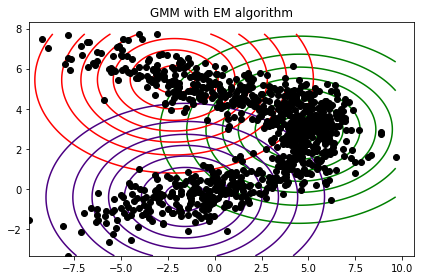

In [36]:
import matplotlib.mlab as mlab
#Then we can plot data with contours
def plot_contours(data, means, covs, title):
    """visualize the gaussian components over the data"""
    plt.figure()
    plt.plot(data[:, 0], data[:, 1], 'ko')

    delta = 0.025
    k = means.shape[0]
    x = np.arange(np.min(data[:,0]), np.max(data[:,0]), delta)
    y = np.arange(np.min(data[:,1]), np.max(data[:,1]), delta)
    X, Y = np.meshgrid(x, y)

    col = ['green', 'red', 'indigo']
    for i in range(k):
        mean = means[i]
        cov = covs[i]
        sigmax = np.sqrt(cov[0][0])
        sigmay = np.sqrt(cov[1][1])
        sigmaxy = cov[0][1] / (sigmax * sigmay)
        Z = mlab.bivariate_normal(X, Y, sigmax, sigmay, mean[0], mean[1], sigmaxy)
        plt.contour(X, Y, Z, colors = col[i])
    
    plt.title(title)
    plt.tight_layout()
    plt.show()
    
plot_contours(X, mu, cov_matrics, 'GMM with EM algorithm')

In [515]:
A= np.array([
    [1,2],
    [3,4]
])
A_new = A[:,np.newaxis,:]
print(A_new)
print(B)
B = np.array([
 [   
    [10,5],
    [20,20]
 ],
 [
     [30,30],
     [40,40]
 ]   
])
# print(A.shape, A_new.shape, B.shape)
print('---')
print(np.einsum('nki,kij->nkij', A_new, B))
print(np.einsum('nki,nkj->nkij', A_new, B))

# print(np.einsum('nki,kij->nikj', A_new, B))
# print(np.einsum('nki,kij->nkj', A_new, B))

[[[1 2]]

 [[3 4]]]
[[10  5]
 [30 30]
 [40 40]]
---
[[[[ 10   5]
   [ 40  40]]

  [[ 30  30]
   [ 80  80]]]


 [[[ 30  15]
   [ 80  80]]

  [[ 90  90]
   [160 160]]]]
[[[[ 10   5]
   [ 20  10]]

  [[ 20  20]
   [ 40  40]]]


 [[[ 90  90]
   [120 120]]

  [[120 120]
   [160 160]]]]


In [478]:
A= np.array([
    [1,2],
    [3,4],
    [5,6],
    [7,8]
])
B = np.array([
 
    [10,5],
     [30,30],
     [40,40]
 ])
A_new = A[:,np.newaxis,:]
print(A_new, B)
print(A_new.shape, B.shape)

print(A_new -B)


[[[1 2]]

 [[3 4]]

 [[5 6]]

 [[7 8]]] [[10  5]
 [30 30]
 [40 40]]
(4, 1, 2) (3, 2)
[[[ -9  -3]
  [-29 -28]
  [-39 -38]]

 [[ -7  -1]
  [-27 -26]
  [-37 -36]]

 [[ -5   1]
  [-25 -24]
  [-35 -34]]

 [[ -3   3]
  [-23 -22]
  [-33 -32]]]


In [506]:

x = np.linspace(0, 5, 10, endpoint=False)
y = multivariate_normal.pdf(x, mean=2.5, cov=0.5); np.sum(y)


1.9987660765966937

In [41]:
a = np.arange(-2, 2, 1)
b = np.arange(-3, 3, 1.5)
print(a,b, a.shape, b.shape)
X, Y = np.meshgrid(a,b)
print(X.shape, Y.shape)
print(X,Y)

[-2 -1  0  1] [-3.  -1.5  0.   1.5] (4,) (4,)
(4, 4) (4, 4)
[[-2 -1  0  1]
 [-2 -1  0  1]
 [-2 -1  0  1]
 [-2 -1  0  1]] [[-3.  -3.  -3.  -3. ]
 [-1.5 -1.5 -1.5 -1.5]
 [ 0.   0.   0.   0. ]
 [ 1.5  1.5  1.5  1.5]]
